# Explore

In [27]:
import folium
import sys
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

sys.path.append("../scripts")

from featherflight import FeatherFlight

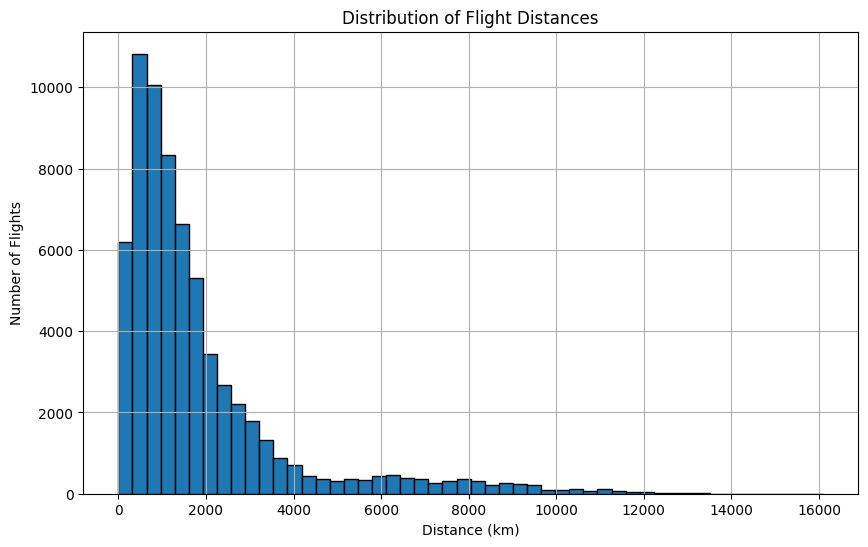

In [36]:
ff = FeatherFlight()
ff.calculate_distances_routes()
ff.distance_analysis()

# Original Method:

C:\Users\User\AppData\Local\Temp\ipykernel_18120\2072800949.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


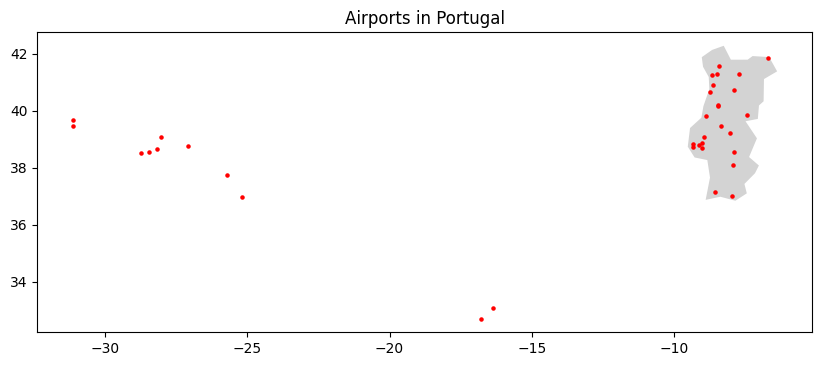

In [29]:
country = "Portugal"

filtered_airports = ff.airports[ff.airports["Country"] == country]
if filtered_airports.empty:
    print(
        f"No airports found for {country}. Please enter a valid country name."
    )

gdf_airports = gpd.GeoDataFrame(
    filtered_airports,
    geometry=gpd.points_from_xy(
        filtered_airports.Longitude, filtered_airports.Latitude
    )
)

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
country_map = world[world["name"] == country]

_, ax = plt.subplots(figsize=(10, 10))
country_map.plot(ax=ax, color="lightgrey")
gdf_airports.plot(ax=ax, marker="o", color="red", markersize=5)
plt.title(f"Airports in {country}")
plt.show()

# Replacement proposal:

In [35]:
import folium

title = f"Airports in {country} ({gdf_airports.shape[0]} airports)"
title_html = """
    <h1 align="left" style="font-size:20px"><b>FeatherFlight</b></h1>
    <h2 align="left" style="font-size:16px"><b>{}</b></h2>
""".format(title)   

# set the figure size of the map
m = folium.Map(width=900,height=400, zoom_start=1)
m.get_root().html.add_child(folium.Element(title_html))

m = country_map.explore(
    m=m,
    column="name",
    scheme="naturalbreaks",
    legend=True,
    tooltip=False,
    legend_kwds=dict(colorbar=False),
    name="Country",
)

gdf_airports.explore(
    m=m,
    color="red",
    marker_kwds=dict(radius=5, fill=True), 
    tooltip=["Airport ID", "Name", "City", "IATA"],  
    tooltip_kwds=dict(labels=True),
    name="Airports",
)

folium.TileLayer("CartoDB positron", show=False).add_to(m)
folium.LayerControl().add_to(m)

sw = gdf_airports[['Latitude', 'Longitude']].min().values.tolist()
ne = gdf_airports[['Latitude', 'Longitude']].max().values.tolist()

m.fit_bounds([sw, ne]) 
m

m